# Predicting Compressive Strength of Concrete: A Machine Learning Approach

Concrete is a foundational material in construction, playing a pivotal role in structures worldwide. Despite its widespread use, concrete is a significant contributor to pollution. Our project addresses this challenge by leveraging the power of machine learning to predict the compressive strength of concrete, a critical property influenced by various factors such as composition, aging, and water content.

As experts in materials science, our team has undertaken this task on behalf of ConcreteRules.ltd, a leading construction company. Their goal is to develop an accurate and efficient prediction model for compressive strength using a comprehensive database gathered through years of experimentation and academic collaboration (available in the `Concrete_database.csv` file).

The predictive model we aim to create will not only enhance the understanding of concrete behavior but will also enable ConcreteRules.ltd to optimize concrete formulations for specific applications. By identifying the most critical variables affecting compressive strength, the company seeks to streamline the measurement process, particularly for challenging scenarios involving old samples or complex and costly experiments.

In summary, our project involves the application of machine learning to predict compressive strength, providing invaluable insights for the construction industry and contributing to the optimization of concrete properties with an emphasis on environmental impact and cost reduction.


In [2]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons, Button
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
from tabulate import tabulate
import time
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import r2_score

## Data Processing 

This code is part of the initial data processing steps for a concrete strength prediction task. It reads a dataset named 'Concrete_Data.csv' into a Pandas DataFrame called 'data_raw' and then creates a copy named 'data' to preserve the raw data. The code displays the count of missing values for each feature in the original dataset using `data_raw.isnull().sum()`. This information is essential for understanding the data quality and identifying potential issues. The subsequent step involves correcting missing values by creating a new DataFrame named 'data' using the `dropna()` function, which removes any rows with missing values. Displaying the count of missing values after correction helps assess the impact of the data cleaning process. Handling missing values is critical in data science and machine learning as it ensures the reliability of the dataset for subsequent analysis and model training.

Missing values can adversely affect model performance, leading to biased or inaccurate predictions. Addressing missing values early in the data processing pipeline is crucial to maintain the integrity of the dataset and enhance the quality of machine learning models trained on it.


The decision to use `dropna()` for handling missing values in the concrete dataset is justified by its relatively large size, where removing rows with missing values has minimal impact on the overall dataset's representativeness. This approach simplifies the data preprocessing and maintains the integrity of the remaining information. Alternative methods such as imputation with mean/median, regression predictions, or interpolation could be considered based on the dataset's characteristics, the extent of missing data, and assumptions about the missing values. However, in this context, the simplicity and efficiency of `dropna()` align well with the dataset's characteristics, making it a suitable choice for preserving the overall quality of the data for subsequent regression analysis.

In [3]:
# Data Processing 

# Read Data
data_raw = pd.read_csv('Concrete_Data.csv')
data_raw = pd.DataFrame(data_raw)

# Display count of missing values for each feature before correction
print("Count of missing values before correction:")
print(data_raw.isnull().sum())

# Correct Missing Values
data = data_raw.copy().dropna()

# Display count of missing values for each feature after correction
print("\nCount of missing values after correction:")
print(data.isnull().sum())

# Display the processed data
data


Count of missing values before correction:
cement               0
slag                 6
flyash               1
water                8
superplasticizer    14
coarseaggregate      7
fineaggregate        3
age                  5
csMPa                0
dtype: int64

Count of missing values after correction:
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365.0,43.70
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


## Data Visualization for Exploratory Analysis

The provided code conducts exploratory data analysis for a concrete strength prediction task. The dataset comprises features, with `y_column` as the target variable and `x_columns` as the features. The code systematically generates histograms for each feature in `x_columns` to visualize their distributions. Histograms offer insights into the central tendency and spread of feature values, aiding in understanding feature characteristics.

In addition to histograms, the code creates scatter plots for each feature against the target variable (`y_column`). Scatter plots are useful for assessing the relationship between individual features and the target variable. This visualization technique provides an initial understanding of potential patterns or correlations within the data.

Exploratory analysis is a fundamental step in data science and machine learning. It helps uncover data trends, identify outliers, and reveal potential relationships between variables. These insights are crucial for making informed decisions in subsequent stages of modeling, such as feature engineering and algorithm selection.


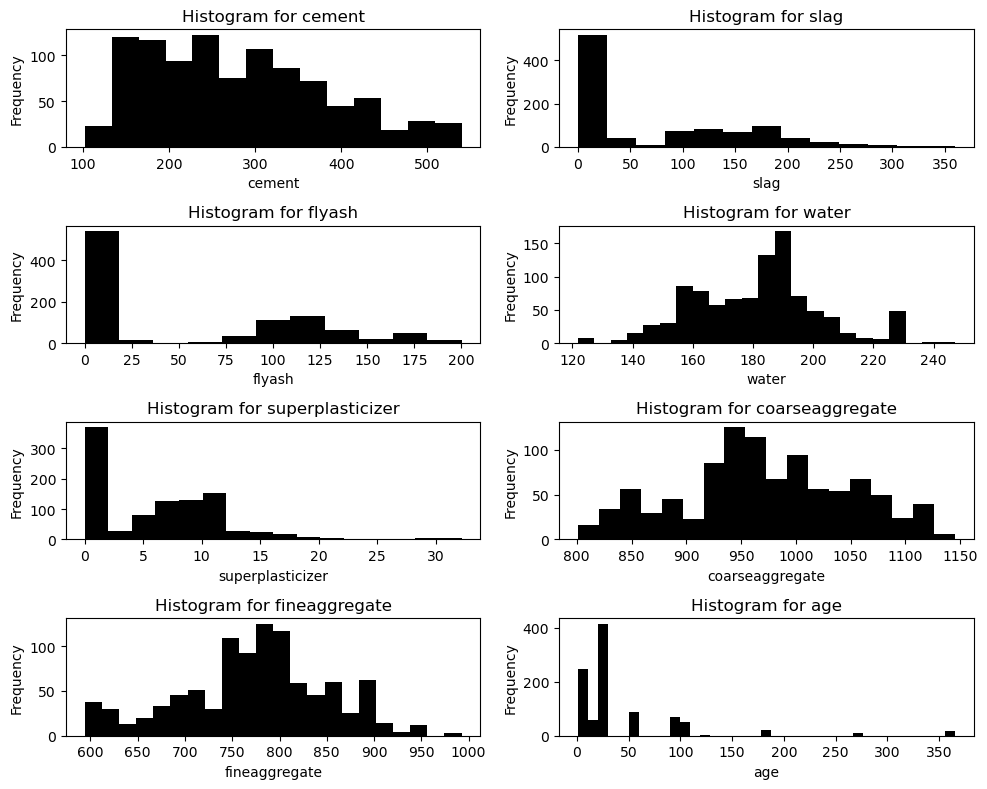

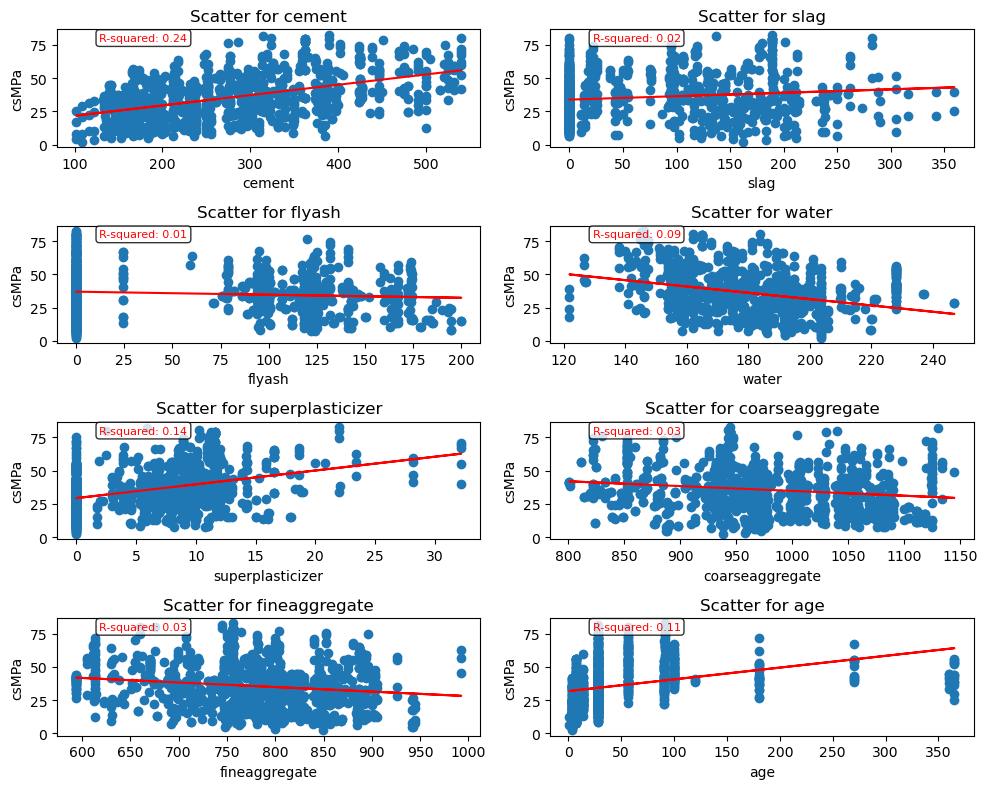

In [4]:


# Assuming you have defined x, y, x_columns, and y_column
# Example:
y_column = data.columns[-1]
x_columns = data.columns[:-1]
x = data[x_columns]
y = data[y_column]

# Set the number of columns for the grid
num_cols = 2

# Calculate the number of rows needed based on the number of columns
num_rows = math.ceil(len(x_columns) / num_cols)

# Create subplots with a grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each column for visualization
for i, column in enumerate(x_columns):
    # Histogram
    axes[i].hist(x[column], bins='auto', color='black')
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Calculate the number of subplots needed for scatter plots
num_subplots = min(len(x_columns), num_cols * num_rows)

# Create a new set of subplots for scatter plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each column for scatter plots
for i, column in enumerate(x_columns[:num_subplots]):
    # Scatter plot
    axes[i].scatter(x[column], y)
    axes[i].set_title(f'Scatter for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel(y_column)

    # Fit a linear regression model
    slope, intercept = np.polyfit(x[column], y, 1)

    # Plot the regression line
    axes[i].plot(x[column], slope * x[column] + intercept, color='red')

    # Calculate R-squared
    y_pred = slope * x[column] + intercept
    r_squared = r2_score(y, y_pred)

    # Display R-squared in a box with white background
    text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axes[i].text(0.1, 0.9, f'R-squared: {r_squared:.2f}', transform=axes[i].transAxes,
                 fontsize=8, color='red', bbox=text_box_props)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


## Data Scaling and Scatter Plot for Machine Learning

The code begins by utilizing the `StandardScaler` from the scikit-learn library to standardize the features in the dataset (`x`). Standardization involves transforming the data so that it has a mean of 0 and a standard deviation of 1. This is essential in machine learning for models that rely on distance metrics, ensuring that all features contribute equally.

For each feature in the dataset, the code displays examples of column data before and after scaling. The `StandardScaler` is fitted and applied separately to each feature to ensure that they are scaled independently. The resulting scaled data is stored in the DataFrame `x_scaled`.

Afterwards, the code resets the state of the scaler and scales the entire dataset (`x`) using the same scaler. While it's common to scale features individually, there are cases where scaling the entire dataset may be preferred, for instance, when using algorithms that are sensitive to feature distributions.

The scatter plots provide insight into how the scaled features influence the target variable, and in this case, it emphasizes that all features are now standardized with a mean of 0. This visual confirmation is valuable for ensuring that the features contribute uniformly to the predictive model, promoting fair comparisons and preventing any individual feature from dominating the others.

Scaling is a crucial step in preparing data for machine learning models, ensuring that features are on a similar scale and preventing certain features from dominating others. The scatter plot aids in the exploratory data analysis phase, allowing for an intuitive understanding of the relationships between individual features and the target variable. This visual inspection is valuable for feature selection and determining the potential impact of features on the predictive model.


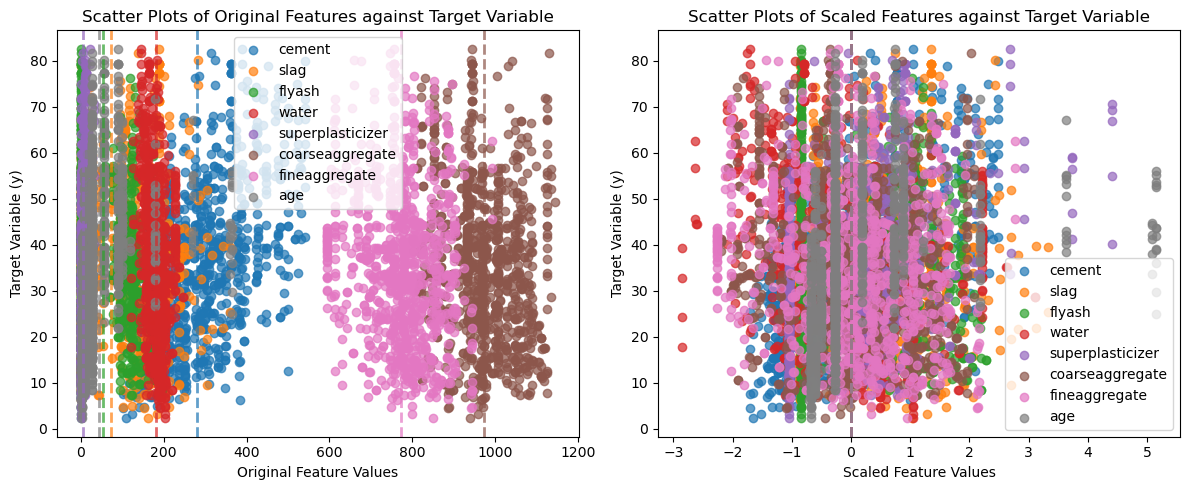

Before and After Scaling Information:
              Column  Before Scaling  After Scaling
0             cement           540.0       2.477663
1             cement           540.0       2.477663
2             cement           332.5       0.493289
3             cement           198.6      -0.787230
4             cement           380.0       0.947543
5               slag             0.0      -0.856832
6               slag             0.0      -0.856832
7               slag           142.5       0.801447
8               slag           132.4       0.683913
9               slag            95.0       0.248687
10            flyash             0.0      -0.851632
11            flyash             0.0      -0.851632
12            flyash             0.0      -0.851632
13            flyash             0.0      -0.851632
14            flyash             0.0      -0.851632
15             water           162.0      -0.940385
16             water           162.0      -0.940385
17             water      

In [5]:

# Assuming x_columns, x, and y are already defined

# Data Scaling
scaler = StandardScaler()
x_scaled = x.copy()

# Create a table to store before and after scaling values
scaling_info = []

# Display examples of column data before and after scaling
for column in x_columns:
    before_scaling = x[column].head().to_list()
    column_data = x[column].values.reshape(-1, 1)
    scaled_column = scaler.fit_transform(column_data).flatten()
    after_scaling = scaled_column[:5].tolist()

    # Update the scaling_info list
    scaling_info.extend(list(zip([column] * 5, before_scaling, after_scaling)))

# Convert the list to a DataFrame
scaling_info = pd.DataFrame(scaling_info, columns=['Column', 'Before Scaling', 'After Scaling'])

# Reset the state of the scaler
scaler = StandardScaler()

# Scale the entire dataset using the same scaler
for i in x_columns:
    column_data = x[i].values.reshape(-1, 1)
    scaled_column = scaler.fit_transform(column_data)
    x_scaled[i] = scaled_column.flatten()

from matplotlib.lines import Line2D

# Scatter plot for each column against the target variable y
plt.figure(figsize=(12, 5))

# Plot for original features
plt.subplot(1, 2, 1)
for column in x_columns:
    points = plt.scatter(x[column], y, label=column, alpha=0.7)

    # Plot the mean of the feature on the x-axis without a label
    mean_line_color = Line2D([0], [0], marker='o', color='w', markerfacecolor=points.get_facecolor()[0], markersize=10)
    plt.axvline(x[column].mean(), color=mean_line_color.get_markerfacecolor(), linestyle='dashed', linewidth=2)

plt.xlabel("Original Feature Values")
plt.ylabel("Target Variable (y)")
plt.title("Scatter Plots of Original Features against Target Variable")
plt.legend()  # Add legend after plotting all data points

# Plot for scaled features
plt.subplot(1, 2, 2)
for column in x_scaled.columns:
    points = plt.scatter(x_scaled[column], y, label=column, alpha=0.7)

    # Plot the mean of the scaled feature on the x-axis without a label
    mean_line_color = Line2D([0], [0], marker='o', color='w', markerfacecolor=points.get_facecolor()[0], markersize=10)
    plt.axvline(x_scaled[column].mean(), color=mean_line_color.get_markerfacecolor(), linestyle='dashed', linewidth=2)

plt.xlabel("Scaled Feature Values")
plt.ylabel("Target Variable (y)")
plt.title("Scatter Plots of Scaled Features against Target Variable")
plt.legend()  # Add legend after plotting all data points

# Adjust layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

# Display the before and after scaling values in a table
print("Before and After Scaling Information:")
print(scaling_info)


The next bit of code shows that scaling the data has not had an effect on the performance of the regressor, but makes it work marginally quicker.

In [26]:

# Create an instance of RandomForestRegressor for the original dataset
reg_original = RandomForestRegressor()

# Perform k-fold cross-validation for the original dataset
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_original = []
fit_times_original = []

for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    start_time = time.time()
    reg_original.fit(x_train, y_train)
    end_time = time.time()

    fit_time_original = end_time - start_time
    fit_times_original.append(fit_time_original)

    score_original = reg_original.score(x_test, y_test)
    scores_original.append(score_original)

# Print the average R-squared score and fit time for the original dataset
print("Average R-squared score (Original Dataset):", np.mean(scores_original))
print("Average Fit time (Original Dataset):", np.mean(fit_times_original))

# Create an instance of RandomForestRegressor for the scaled dataset
reg_scaled = RandomForestRegressor(random_state=42)

# Perform k-fold cross-validation for the scaled dataset
scores_scaled = []
fit_times_scaled = []

for train_index, test_index in kfold.split(x_scaled):
    x_train_scaled, x_test_scaled = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    start_time = time.time()
    reg_scaled.fit(x_train_scaled, y_train)
    end_time = time.time()

    fit_time_scaled = end_time - start_time
    fit_times_scaled.append(fit_time_scaled)

    score_scaled = reg_scaled.score(x_test_scaled, y_test)
    scores_scaled.append(score_scaled)

# Print the average R-squared score and fit time for the scaled dataset
print("\nAverage R-squared score (Scaled Dataset):", np.mean(scores_scaled))
print("Average Fit time (Scaled Dataset):", np.mean(fit_times_scaled))


Average R-squared score (Original Dataset): 0.9008183461655426
Average Fit time (Original Dataset): 0.7983437061309815

Average R-squared score (Scaled Dataset): 0.9038016727522791
Average Fit time (Scaled Dataset): 0.7864477157592773


## Defining Models and Hyperparameters 

This code segment is dedicated to model selection and hyperparameter tuning through k-fold cross-validation. It defines a set of regression models, including Random Forest (RF), K-Nearest Neighbors (KN), Support Vector Regressor (SVR), Ridge, Lasso, and Linear Regression (LR). To optimize each model's performance, a grid search approach is employed to explore various hyperparameter values for each model. The selected hyperparameters are determined based on their impact on cross-validated performance metrics, namely the R-squared score (Score) and Root Mean Squared Error (RMSE).

In [14]:
# Define models
models = {
    'RF': RandomForestRegressor(),
    'KN': KNeighborsRegressor(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'LR': LinearRegression()
}

# Mapping of models to hyperparameter names and values
model_hyperparams = {
    'RF': {'param_name': 'n_estimators', 'param_values': list(range(20, 141, 30))},
    'KN': {'param_name': 'n_neighbors', 'param_values': list(range(1, 10, 2))},
    'SVR': {'param_name': 'gamma', 'param_values': list(np.logspace(-2, 1, num=min(4, 100), endpoint=True, base=10.0))},
    'Ridge': {'param_name': 'alpha', 'param_values': list(np.logspace(-2, 1, num=min(4, 100), endpoint=True, base=10.0))},
    'Lasso': {'param_name': 'alpha', 'param_values': list(np.logspace(-2, 1, num=min(4, 100), endpoint=True, base=10.0))},
    'LR': {'param_name': 'NA', 'param_values': ['NA']}
}


## Hyperparameter Tuning and Model Evaluation


This code snippet implements k-fold cross-validation to evaluate multiple machine learning models with different hyperparameters. The objective is to assess the performance of each model on various subsets of the dataset, providing a robust measure of their effectiveness.

## Implementation Details

- **Number of Trials:** The code allows for multiple trials, each involving the evaluation of models with different hyperparameters.
- **Number of Splits (k-fold):** K-Fold cross-validation is employed with a specified number of splits.
- **Models and Hyperparameters:** A list of machine learning models along with their corresponding hyperparameter search spaces is provided. The code iterates through these models and hyperparameters, fitting and evaluating them using k-fold cross-validation.
- **Scoring:** For each model and hyperparameter combination, the code calculates the model's score and Root Mean Squared Error (RMSE) on the validation data for each fold. These results are then stored in the `all_results` list.

## Purpose

K-fold cross-validation is a crucial technique in machine learning to assess a model's performance while addressing issues like overfitting or underfitting. It provides a more reliable estimate of a model's generalization performance compared to a single train-test split. The results stored in `all_results` can be further analyzed to identify the best-performing models and their corresponding hyperparameters.


In [15]:
# List to store cross-validation scores and RMSE
all_results = []

# Set Number of Splits in KFold
n_splits = 2

# Separate Testing and Training Fractions (simple k-fold should work due to a large dataset/TimeSeriesSplit)
# Note random state is 27
kf = KFold(n_splits=n_splits, shuffle=True, random_state=27)

# Perform Kfold cross-validation

# Reset scores list for each trial
scores = []

# Iterate for Every Model on the List
for model_name, model_instance in models.items():
    hyper_params_info = model_hyperparams[model_name]
    hyper_params = hyper_params_info['param_values']
    param_name = hyper_params_info['param_name']

    # Iterate for Set List of Hyperparameters
    for param in hyper_params:
        # Instantiate the model with the current hyperparameter
        model_instance = models[model_name]
        if param_name != 'NA':
            model_instance.set_params(**{param_name: param})

        # Perform k-fold cross-validation
        for train_index, val_index in kf.split(x_scaled):
            x_train, x_val = x_scaled.iloc[train_index], x_scaled.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            # Fit the model on the training data
            model_instance.fit(x_train, y_train)

            # Evaluate the model on the validation data and store the score and RMSE
            score = model_instance.score(x_val, y_val)
            y_pred = model_instance.predict(x_val)
            rmse = np.sqrt(mean_squared_error(y_val, y_pred))
            scores.append({'Model': model_name, 'Hyperparameter': param, 'Score': score, 'RMSE': rmse})

# Store the results for each model in each trial
all_results.extend(scores)

## Model Performance
Finally, the code generates bar charts visualizing the best R-squared scores and RMSE values for each model, aiding in the comparative assessment of model performance. This process is essential in selecting the most suitable regression model for the given dataset, ensuring that the chosen model performs optimally and avoids overfitting or underfitting. The visualizations provide a clear overview of each model's strengths, aiding in the decision-making process for model deployment in real-world applications.



All Results with Hyperparameters:
    Model Hyperparameter     Score       RMSE
0      RF             20  0.864798   6.127586
1      RF             20  0.881798   5.651045
2      RF             50  0.871837   5.965955
3      RF             50  0.882504   5.634148
4      RF             80  0.870249   6.002793
5      RF             80  0.889949   5.452725
6      RF            110  0.872557   5.949177
7      RF            110  0.887609   5.510374
8      RF            140  0.870408   5.999115
9      RF            140  0.887631   5.509847
10     KN              1  0.627250  10.174369
11     KN              1  0.609582  10.270252
12     KN              3  0.669593   9.579068
13     KN              3  0.695975   9.062975
14     KN              5  0.646240   9.911807
15     KN              5  0.706191   8.909411
16     KN              7  0.620956  10.259907
17     KN              7  0.675939   9.356856
18     KN              9  0.613167  10.364785
19     KN              9  0.655098   9.653041

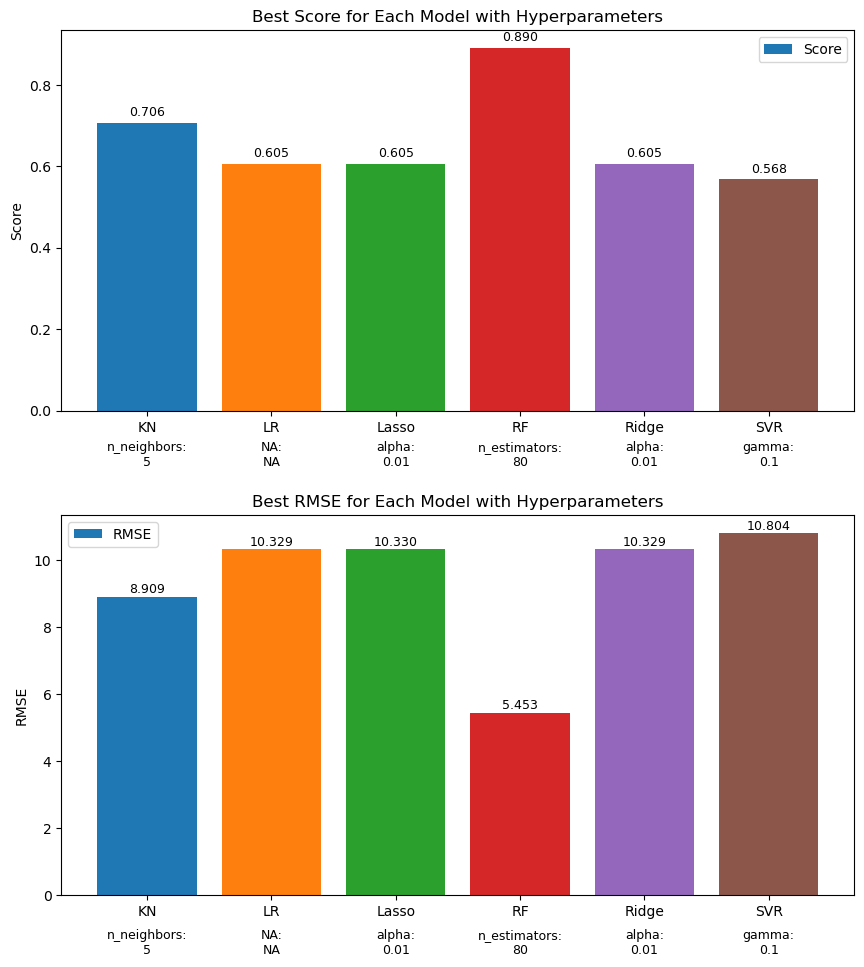

In [16]:
# Display all results with best hyperparameters, scores, and RMSE
All_Results = pd.DataFrame(all_results)
print("\nAll Results with Hyperparameters:")
print(All_Results)

# Find the index of the rows with the best scores for each model
best_score_indices = All_Results.groupby('Model')['Score'].idxmax()
best_rmse_indices = All_Results.groupby('Model')['RMSE'].idxmin()

# Extract the corresponding rows
best_scores_df = All_Results.loc[best_score_indices]
best_rmse_df = All_Results.loc[best_rmse_indices]

# Set a color palette (you can choose your own or use one of Matplotlib's built-in colormaps)
colors = plt.cm.tab10.colors

# Plot separate bar charts for the best scores and RMSE values, with different colors for each model
fig, axes = plt.subplots(2, 1, figsize=(9, 10))

# Plot for the best scores
axes[0].bar(best_scores_df['Model'], best_scores_df['Score'], color=colors, label='Score')
axes[0].set_ylabel('Score')
axes[0].set_title('Best Score for Each Model with Hyperparameters')
axes[0].legend()

# Display hyperparameters, score, and RMSE values on top of each bar
for idx, (value, model, hyperparameter) in enumerate(zip(best_scores_df['Score'], best_scores_df['Model'], best_scores_df['Hyperparameter'])):
    param_name = model_hyperparams[model]['param_name']
    axes[0].text(idx, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=9, color='black')
    axes[0].text(idx, -0.075, f'{param_name}:\n{hyperparameter}', ha='center', va='top', fontsize=9, color='black')

# Plot for the best RMSE values
axes[1].bar(best_rmse_df['Model'], best_rmse_df['RMSE'], color=colors, label='RMSE')
axes[1].set_ylabel('RMSE')
axes[1].set_title('Best RMSE for Each Model with Hyperparameters')
axes[1].legend()

# Display hyperparameters, score, and RMSE values on top of each bar
for idx, (value, model, hyperparameter) in enumerate(zip(best_rmse_df['RMSE'], best_rmse_df['Model'], best_rmse_df['Hyperparameter'])):
    param_name = model_hyperparams[model]['param_name']
    axes[1].text(idx, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=9, color='black')
    axes[1].text(idx, -1, f'{param_name}:\n{hyperparameter}', ha='center', va='top', fontsize=9, color='black')

# Adjust layout to prevent overlapping
plt.tight_layout(pad=2.0)
plt.show()


# Random Forest Hyperparameter Tuning with Cross-Validation
The primary goal of this code is to perform grid search for finding the best hyperparameters for a Random Forest Regressor model using cross-validation. By systematically exploring different combinations of hyperparameters, the code aims to identify the set of values that lead to the highest model performance.

## Hyperparameters and Search Space:
n_estimators: Number of trees in the forest.
max_depth: Maximum depth of the trees.
min_samples_split: Minimum number of samples required to split an internal node.
min_samples_leaf: Minimum number of samples required to be at a leaf node.
Cross-Validation Setup:
The code utilizes nested loops to iterate over various combinations of hyperparameters. For each combination, it performs k-fold cross-validation, training the Random Forest model on different subsets of the dataset and evaluating its performance on validation sets. The score represents the model's performance, and RMSE (Root Mean Squared Error) is calculated for additional evaluation.

When `n_jobs` is set to `-1`, it means that the algorithm should use all available processors or CPU cores to perform the computation in parallel.

Results, including hyperparameters and corresponding scores, are stored for further analysis. Additionally, a baseline Random Forest model is trained without hyperparameter tuning. The code prints a comparison between the best-performing model and the baseline model in terms of their scores.

Tuning hyperparameters is crucial for optimizing model performance. The code systematically explores a grid of values for key hyperparameters, facilitating the identification of the combination that yields the best results.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from IPython.display import clear_output
import numpy as np
import pandas as pd

# Define the Random Forest model with n_jobs=-1 to maximise processor
rf_model = RandomForestRegressor(n_jobs=-1)

# Define hyperparameters and their potential values
rf_hyperparams = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None] + list(range(5, 101, 10)),
    'min_samples_split': list(range(2, 21, 2)),
    'min_samples_leaf': list(range(1, 21, 2))
}

# List to store cross-validation scores and RMSE
rf_results = []

# Set Number of Trials and Number of Splits in KFold
trials = 1
n_splits = 2

# Separate Testing and Training Fractions (simple k-fold should work due to a large dataset/TimeSeriesSplit)
# Note random state is 27
kf = KFold(n_splits=n_splits, shuffle=True, random_state=27)

# Perform Kfold cross-validation
for i in range(trials):
    
    # Reset scores list for each trial
    rf_scores = []

    # Iterate for Set List of Hyperparameters
    for n_estimators in rf_hyperparams['n_estimators']:
        for max_depth in rf_hyperparams['max_depth']:
            for min_samples_split in rf_hyperparams['min_samples_split']:
                for min_samples_leaf in rf_hyperparams['min_samples_leaf']:
                    # Instantiate the Random Forest model with the current hyperparameters
                    rf_model.set_params(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf
                    )

                    # Print current iteration information
                    print(f"\nIteration {i + 1} - Hyperparameters:")
                    print(f"Number of Estimators: {n_estimators}")
                    print(f"Max Depth: {max_depth}")
                    print(f"Min Samples Split: {min_samples_split}")
                    print(f"Min Samples Leaf: {min_samples_leaf}")

                    # Perform k-fold cross-validation
                    for train_index, val_index in kf.split(x_scaled):
                        x_train, x_val = x_scaled.iloc[train_index], x_scaled.iloc[val_index]
                        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

                        # Fit the Random Forest model on the training data
                        rf_model.fit(x_train, y_train)

                        # Evaluate the model on the validation data and store the score and RMSE
                        score = rf_model.score(x_val, y_val)
                        y_pred_rf = rf_model.predict(x_val)
                        rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
                        rf_scores.append({
                            'Model': 'RF',
                            'Hyperparameter_n_estimators': n_estimators,
                            'Hyperparameter_max_depth': max_depth,
                            'Hyperparameter_min_samples_split': min_samples_split,
                            'Hyperparameter_min_samples_leaf': min_samples_leaf,
                            'Score': score,
                            'RMSE': rmse_rf
                        })

                    # Clear the output for the next iteration
                    clear_output(wait=True)

    # Store the results for each Random Forest model in each trial
    rf_results.extend(rf_scores)

# Extract the information about the best Random Forest regressor model
best_rf_index = pd.DataFrame(rf_results)['Score'].idxmax()
best_rf_info = pd.DataFrame(rf_results).loc[best_rf_index]
best_rf_n_estimators = best_rf_info['Hyperparameter_n_estimators']
best_rf_max_depth = best_rf_info['Hyperparameter_max_depth']
best_rf_min_samples_split = best_rf_info['Hyperparameter_min_samples_split']
best_rf_min_samples_leaf = best_rf_info['Hyperparameter_min_samples_leaf']
best_rf_score = best_rf_info['Score']

# Print information about the best Random Forest regressor model
print("\nBest Random Forest Regressor:")
print(f"Number of Estimators: {best_rf_n_estimators}")
print(f"Max Depth: {best_rf_max_depth}")
print(f"Min Samples Split: {best_rf_min_samples_split}")
print(f"Min Samples Leaf: {best_rf_min_samples_leaf}")
print(f"Score: {best_rf_score:.3f}")

# Evaluate the Random Forest model without tuning other hyperparameters
baseline_rf_model = RandomForestRegressor(n_jobs=-1)
baseline_rf_model.fit(x_train, y_train)
baseline_rf_score = baseline_rf_model.score(x_val, y_val)

# Print comparison between the best Random Forest regressor and the baseline model
print("\nComparison with Baseline Random Forest Regressor:")
print(f"Score of Best Random Forest Regressor: {best_rf_score:.3f}")
print(f"Score of Baseline Random Forest Regressor: {baseline_rf_score:.3f}")



Best Random Forest Regressor:
Number of Estimators: 100
Max Depth: 55.0
Min Samples Split: 2
Min Samples Leaf: 1
Score: 0.891

Comparison with Baseline Random Forest Regressor:
Score of Best Random Forest Regressor: 0.891
Score of Baseline Random Forest Regressor: 0.888


This shows that optimising the hyperparameters of the Random Forest algorithm only marginally improves the score on this particular dataset.

# Model Predictivity

## Overfitting

The discrepancy between the R-squared scores on the training and test sets is a key observation. A significantly higher score on the training set compared to the test set suggests potential overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and specific patterns that may not generalize well to new, unseen data. Although the model performs well on the training set, its effectiveness may diminish when applied to new data. To mitigate overfitting, one can explore strategies such as adjusting hyperparameters, increasing the size of the dataset, or implementing regularization techniques. The findings underscore the importance of assessing model generalization beyond training performance for robust and reliable predictive modeling.

In [18]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor instance
rf_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(x_train, y_train)

# Predict the values on the training set
y_pred_train = rf_model.predict(x_train)

# Predict the values on the test set
y_pred_test = rf_model.predict(x_test)

# Calculate R-squared scores for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Print the R-squared scores
print(f"R-squared score on the training set: {r2_train:.3f}")
print(f"R-squared score on the test set: {r2_test:.3f}")


R-squared score on the training set: 0.984
R-squared score on the test set: 0.893


## Best Regressor
This code segment finalizes the evaluation and visualization steps for the best-performing regressor in the machine learning pipeline. Once the optimal regressor and its corresponding hyperparameters are determined based on cross-validation results, the script proceeds to fit this model to the entire dataset. Subsequently, the script generates predicted values for the dependent variable (y) using the trained regressor.

The visualization phase involves creating subplots for each feature against the last column (target variable) in the dataset. Scatter plots are utilized to visually compare the actual values (in blue) against the predicted values (in red) for the selected regressor. This visual inspection facilitates a qualitative assessment of how well the model captures the relationships between features and the target variable.

From a machine learning and data science perspective, this visualization step is crucial for gaining insights into the predictive performance of the chosen regressor on the entire dataset. It enables a better understanding of how well the model generalizes to unseen data, identifying areas where predictions align well with actual values and areas that may require further refinement or exploration. This analysis is fundamental for validating the model's effectiveness and guiding potential improvements.


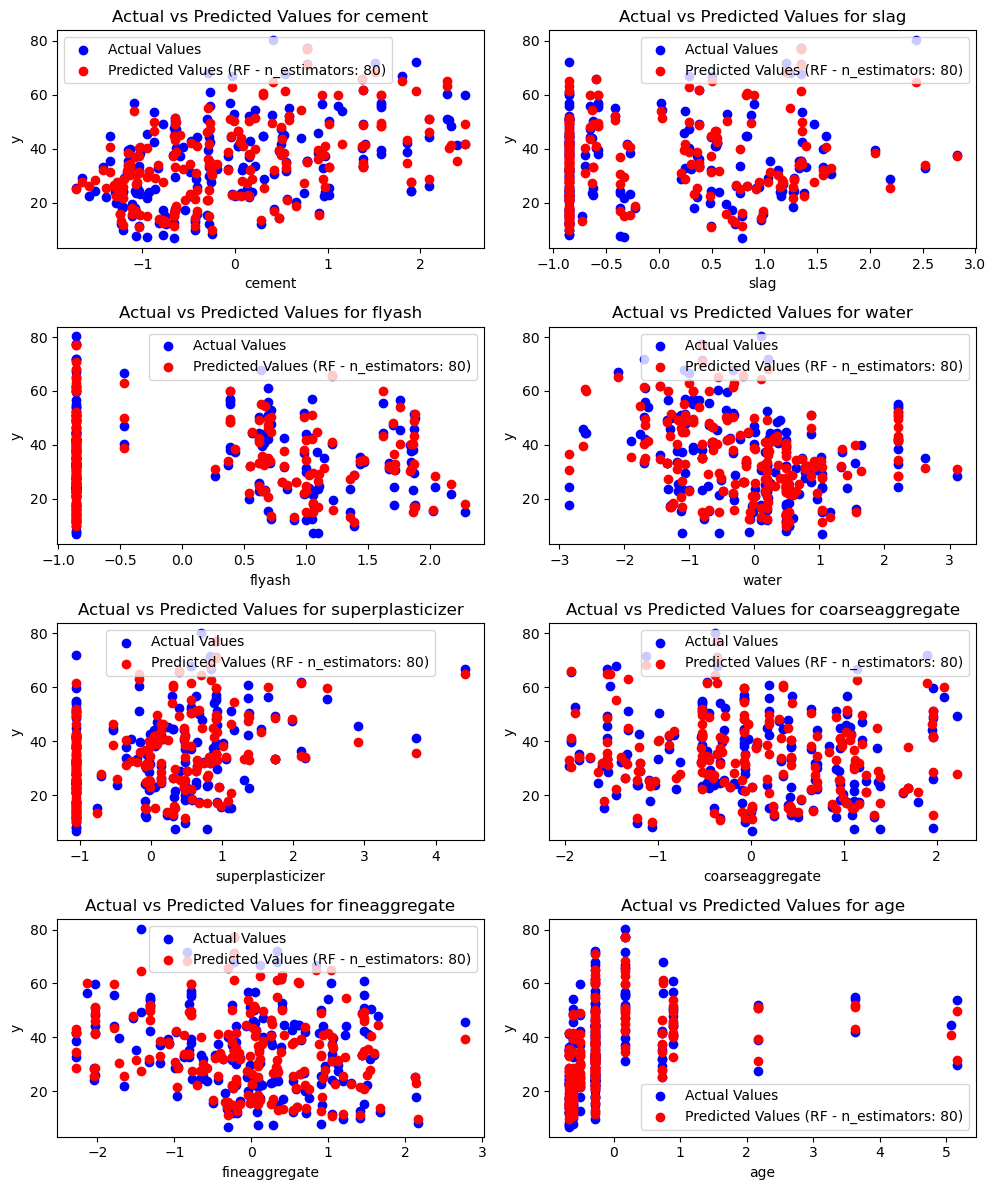

In [19]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Extract information about the best regressor model
best_regressor_index = best_scores_df['Score'].idxmax()
best_regressor_info = All_Results.loc[best_regressor_index]
best_regressor = best_regressor_info['Model']
best_hyperparameter = best_regressor_info['Hyperparameter']
best_regressor_model = models[best_regressor]

# Set the best hyperparameter for the selected regressor
if best_hyperparameter != 'NA':
    param_name = model_hyperparams[best_regressor]['param_name']
    best_regressor_model.set_params(**{param_name: best_hyperparameter})

# Fit the best regressor model on the training data
best_regressor_model.fit(x_train, y_train)

# Predict the values on the test set
y_pred_test = best_regressor_model.predict(x_test)

# Get the number of features in the dataframe (excluding the last column)
num_features = len(data.columns) - 1

# Set the number of columns for subplots
num_cols = 2

# Calculate the number of rows and columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each feature in the dataframe (excluding the last column)
for i, feature_column in enumerate(data.columns[:-1]):
    # Plot the graph for each feature against the last column
    axes[i].scatter(x_test[feature_column], y_test, label='Actual Values', color='blue')
    axes[i].scatter(x_test[feature_column], y_pred_test,
                    label=f'Predicted Values ({best_regressor} - {param_name}: {best_hyperparameter})', color='red')
    axes[i].set_xlabel(feature_column)
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].set_title(f'Actual vs Predicted Values for {feature_column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

>**Comparison of Actual and Predicted Values for each Feature using the Best Regressor Model**
This figure presents a visual examination of the relationship between actual and predicted values for each feature using the best regressor model. Each subplot corresponds to a different feature, with blue dots representing actual values and red dots representing predicted values obtained from the selected regressor model (`{}` with Hyperparameter: `{}`). The analysis provides insights into the model's performance across various features.


## Worst Regressor
This code block is dedicated to visualizing the performance of the worst-performing regressor among the best-performing models identified in the previous analysis. Similar to the visualization for the best regressor, this section plots scatter plots for each feature against the last column (target variable), showcasing the actual values (in blue) and the predicted values (in red) generated by the worst-performing regressor among the best-performing models.

From a machine learning and data science perspective, this visualization provides a crucial comparison to the previous analysis that focused on the best-performing regressor. By examining the plots for the worst-performing regressor among the best models, practitioners gain insights into the limitations or challenges faced by this specific model. Understanding where the model struggles or exhibits poor predictive performance is essential for identifying potential areas of improvement, guiding further model refinement, or prompting exploration of alternative algorithms.

The comparison between the best and worst regressors among the best-performing models offers a holistic view of the overall model landscape. It helps data scientists and machine learning practitioners make informed decisions about model selection, tuning, and optimization, contributing to the iterative and improvement-driven nature of the modeling process.


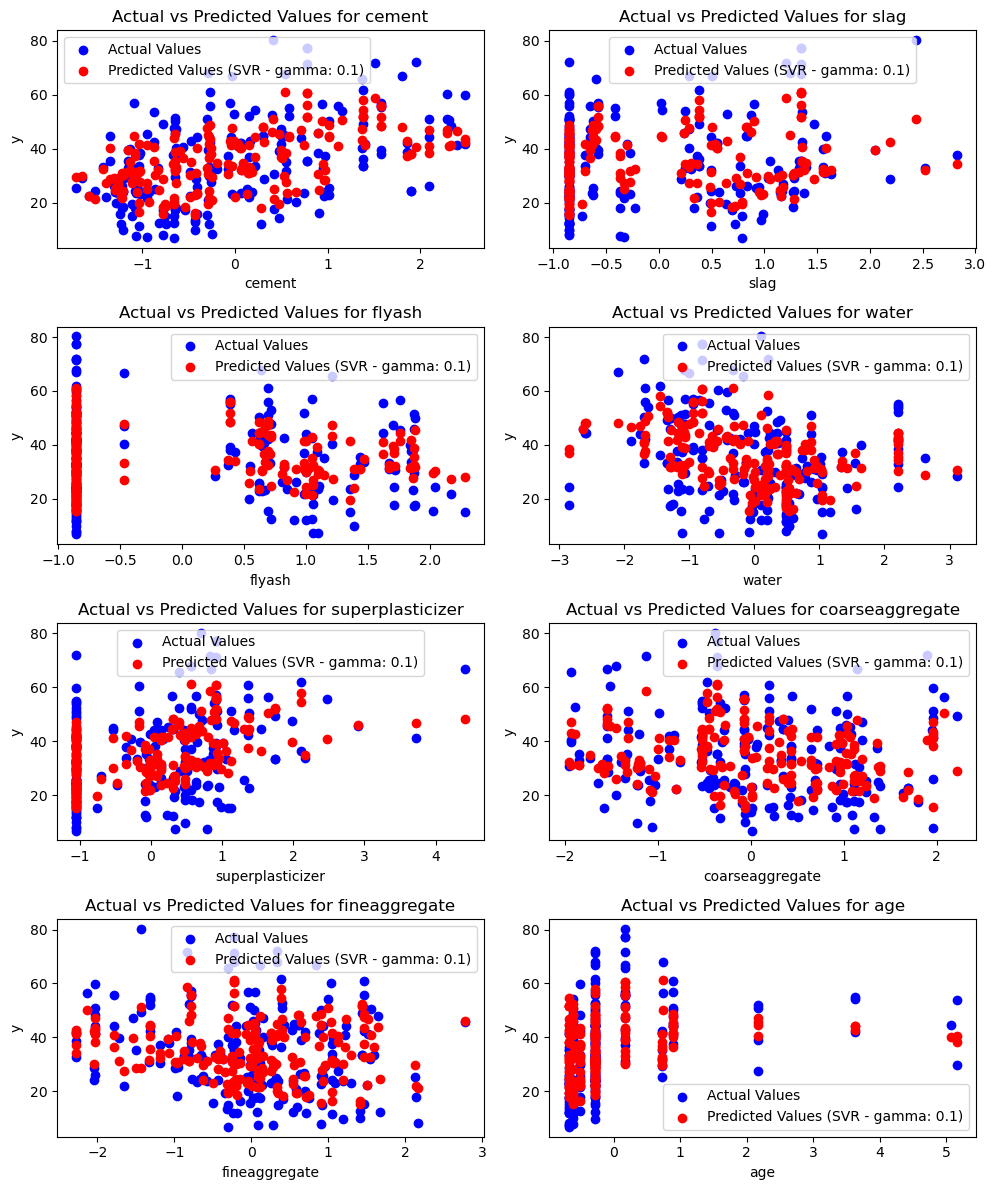

In [20]:
from sklearn.model_selection import train_test_split

# Find the index of the rows with the worst scores for each model among the best performers
worst_score_indices_among_best = best_scores_df.groupby('Model')['Score'].idxmin()
worst_rmse_indices_among_best = best_rmse_df.groupby('Model')['RMSE'].idxmax()

# Extract the corresponding rows for the worst-performing regressor among the best performers
worst_scores_among_best = All_Results.loc[worst_score_indices_among_best]
worst_rmse_among_best = All_Results.loc[worst_rmse_indices_among_best]

# Extract the information about the worst-performing regressor among the best performers
worst_regressor_index_among_best = worst_scores_among_best['Score'].idxmin()
worst_regressor_info_among_best = All_Results.loc[worst_regressor_index_among_best]
worst_regressor = worst_regressor_info_among_best['Model']
worst_hyperparameter = worst_regressor_info_among_best['Hyperparameter']
worst_regressor_model_among_best = models[worst_regressor]

# Set the worst hyperparameter for the selected regressor
if worst_hyperparameter != 'NA':
    param_name = model_hyperparams[worst_regressor]['param_name']
    worst_regressor_model_among_best.set_params(**{param_name: worst_hyperparameter})

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Fit the worst-performing regressor model among the best performers on the training data
worst_regressor_model_among_best.fit(x_train, y_train)

# Predict the values on the test set
y_pred_worst_regressor_among_best = worst_regressor_model_among_best.predict(x_test)

# Get the number of features in the dataframe (excluding the last column)
num_features = len(data.columns) - 1

# Set the number of columns for subplots
num_cols = 2

# Calculate the number of rows and columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through each feature in the dataframe (excluding the last column)
for i, feature_column in enumerate(data.columns[:-1]):
    # Plot the graph for each feature against the last column using the test set
    axes[i].scatter(x_test[feature_column], y_test, label='Actual Values', color='blue')
    axes[i].scatter(x_test[feature_column], y_pred_worst_regressor_among_best,
                    label=f'Predicted Values ({worst_regressor} - {param_name}: {worst_hyperparameter})', color='red')
    axes[i].set_xlabel(feature_column)
    axes[i].set_ylabel('y')
    axes[i].legend()
    axes[i].set_title(f'Actual vs Predicted Values for {feature_column}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


> Actual vs. Predicted Values for the worst-performing regressor among the best performers. Each subplot represents a feature against the target variable ('y'). The blue dots indicate the actual values from the test set, while the red dots represent the predicted values from the model trained on the worst-performing regressor among the best performers. The model was evaluated on a separate test set to assess its generalization performance. Discrepancies between actual and predicted values provide insights into the model's ability to generalize to new data, with considerations for potential overfitting or underfitting.


## Feature Importance
The provided code implements an interactive data visualization tool using Matplotlib in a Jupyter notebook environment. It allows users to dynamically explore the impact of feature removal on the performance of linear regression (LR) and random forest (RF) regression models. The tool includes radio buttons for selecting features to remove, a reset button to revert to the original dataset, and a bar chart displaying the scores of LR and RF models before and after feature removal.

From a machine learning and data science perspective, this tool facilitates the analysis of feature importance and its influence on model performance. The initial bar chart displays the scores of the LR and RF models on the original dataset, serving as a baseline. As users interactively remove features using the radio buttons, the chart dynamically updates to show the impact of each feature removal on model scores.

The LR and RF models are fitted and evaluated on the dataset, and their scores are visualized for comparison. The LR was added alongside the RF as random forest regression has some degree of randomness, which outweighs the effect of removing features which have little impact on the score. The ability to reset the dataset to its original state allows users to experiment with various feature combinations while maintaining a reference point. This type of interactive visualization is valuable for feature selection and understanding the sensitivity of different models to specific features, aiding in the iterative and exploratory aspects of the data science workflow.



<IPython.core.display.Javascript object>


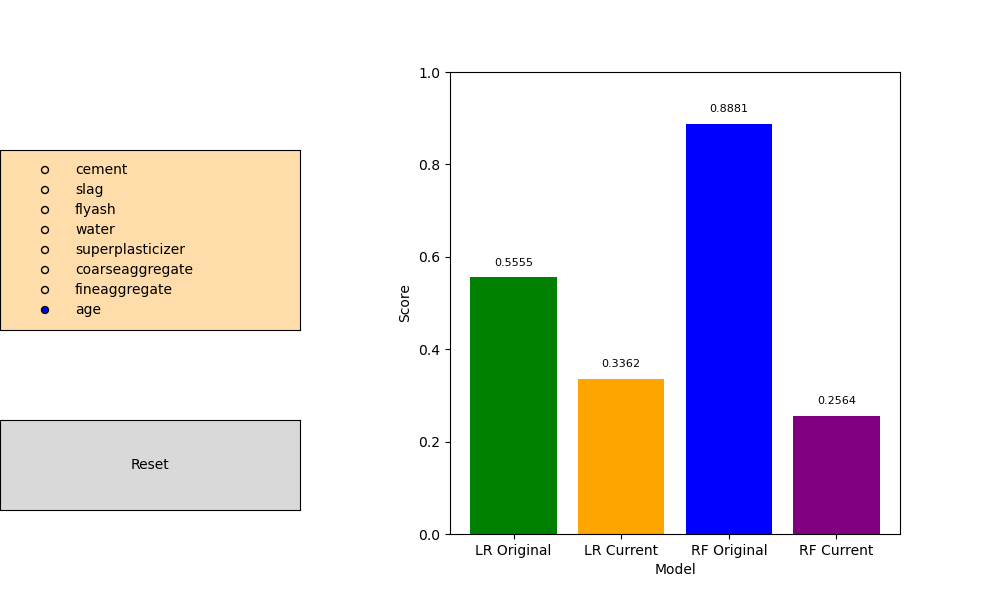

In [21]:
%matplotlib nbagg

def prepare_data(data):
    X = data.drop(data.columns[-1], axis=1)
    y = data[data.columns[-1]]
    return X, y

def fit_and_evaluate_models(x_train, x_test, y_train, y_test):
    rf_model = RandomForestRegressor(n_estimators=50).fit(x_train, y_train)
    rf_score = rf_model.score(x_test, y_test)
    lr_model = LinearRegression().fit(x_train, y_train)
    lr_score = lr_model.score(x_test, y_test)
    return rf_score, lr_score


def create_and_update_plot(scores, index, colors, ax):
    ax.clear()
    bars = ax.bar(index, scores, color=colors)
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.set_ylim(0, 1)

    for bar, score in zip(bars, scores):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{score:.4f}', ha='center', va='bottom', fontsize=8, color='black')

fig, ax = plt.subplots(figsize=(10, 6))  # adjust figsize as needed
plt.subplots_adjust(left=0.45)

# Create space for radio buttons and reset button on the side
radio_ax = plt.axes([0.0, 0.45, 0.3, 0.3], facecolor='#FFDDAA')
reset_ax = plt.axes([0.0, 0.15, 0.3, 0.15])

original_data = data.copy()  # Store a copy of the original dataset
features = list(data.columns[:-1])
# Create radio buttons with vertical orientation
radio = RadioButtons(radio_ax, features)

# Create reset button
reset_button = Button(reset_ax, "Reset")
X, y = prepare_data(original_data)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_original_score, lr_original_score = fit_and_evaluate_models(x_train, x_test, y_train, y_test)
scores = [lr_original_score, lr_original_score, rf_original_score, rf_original_score]
index = ["LR Original", "LR Current", "RF Original", "RF Current"]
colors = ["green", "orange", "blue", "purple"]

create_and_update_plot(scores, index, colors, ax)

def reset_callback(event):
    global data
    data = original_data.copy()
    X, y = prepare_data(data)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_score, lr_score = fit_and_evaluate_models(x_train, x_test, y_train, y_test)
    scores = [lr_original_score, lr_score, rf_original_score, rf_score]
    create_and_update_plot(scores, index, colors, ax)

def feature_removal_callback(label):
    del data[label]
    X, y = prepare_data(data)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_score, lr_score = fit_and_evaluate_models(x_train, x_test, y_train, y_test)
    scores = [lr_original_score, lr_score, rf_original_score, rf_score]
    create_and_update_plot(scores, index, colors, ax)
    
# Connect callbacks to buttons
radio.on_clicked(feature_removal_callback)
reset_button.on_clicked(reset_callback)

plt.show()



The Linear Regression model is initially fitted using the training data, and its coefficients are extracted. The code then calculates the gradient or magnitude of these coefficients and visualizes them using a bar chart. Each feature is represented by a colored bar, with colors indicating the gradient of the corresponding coefficient. The primary objective of this visualization is to discern the impact of individual features on the prediction made by the Linear Regression model. In the interpretation, it's observed that the 'age' feature has the most negative coefficient, suggesting a significant influence on the model's predictions. Additionally, despite the 'superplasticizer' feature having a large coefficient, it might not exert as much influence on predictivity, prompting the need for further analysis. This insight is valuable for understanding the relative importance of features and potential areas for model improvement or refinement.

<IPython.core.display.Javascript object>


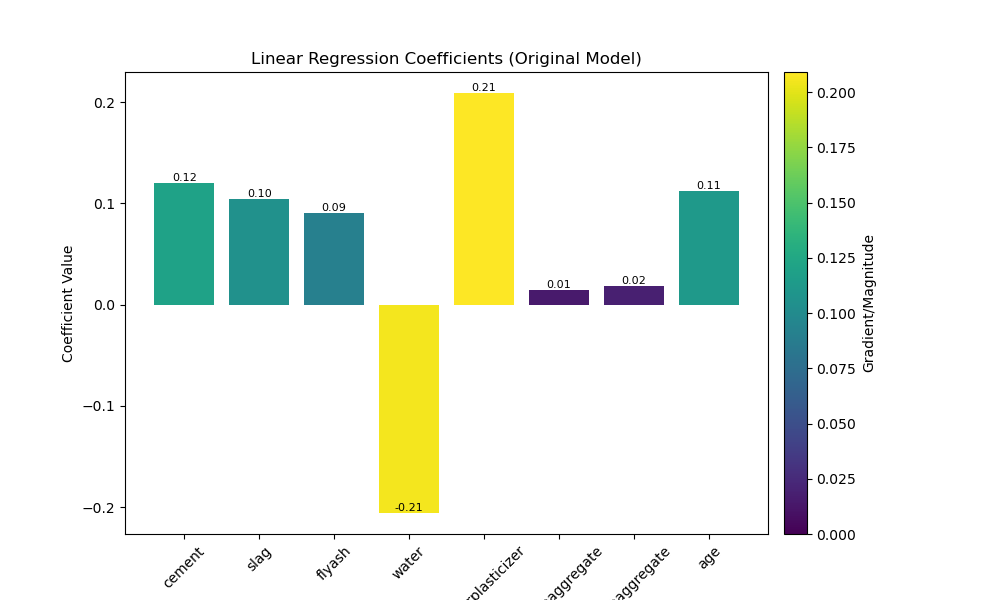

In [22]:
# Assuming x_train, x_test, y_train, and y_test are defined

# Fit the Linear Regression model on the training data
lr_model_original = LinearRegression().fit(x_train, y_train)

# Get the coefficients and feature names
lr_coefficients_original = lr_model_original.coef_
feature_names = x_train.columns

# Calculate the gradient/magnitude of coefficients
gradient = np.abs(lr_coefficients_original)

# Use the viridis colormap to assign colors based on the gradient
colors = plt.cm.viridis(gradient / np.max(gradient))

# Plot the linear regression coefficients in a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(feature_names, lr_coefficients_original, color=colors)
ax.set_xlabel("Feature")
ax.set_ylabel("Coefficient Value")
ax.set_title("Linear Regression Coefficients (Original Model)")
plt.xticks(rotation=45)

# Add a colorbar to show the gradient/magnitude information
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=np.max(gradient)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Gradient/Magnitude')

# Annotate each bar with the corresponding coefficient value
for bar, coef_value in zip(bars, lr_coefficients_original):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{coef_value:.2f}', ha='center', va='bottom', fontsize=8, color='black')

plt.show()


## Conclusion
After experimenting with the interactive graph, it was found that age has the biggest effect on the predictivity of the model was the age, while the one that had the smallest impact was the superplasticizer. 
